### Movie Recommendation System / KNN

Recommendation `system` using the K-Nearest Neighbors algorithm.  
We load the 5000 dataset into `dataframe`.  

In [110]:
import pandas as pd
import numpy as np
import json
from icecream import ic

movies = pd.read_csv('data/tmdb_5000_movies.csv') # DataFrame
credits = pd.read_csv('data/tmdb_5000_credits.csv') # DataFrame

display(movies.head())
display(credits.head())

ic(movies.columns)
ic(credits.columns);

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


ic| movies.columns: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
                           'original_title', 'overview', 'popularity', 'production_companies',
                           'production_countries', 'release_date', 'revenue', 'runtime',
                           'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
                           'vote_count'],
                          dtype='object')
ic| credits.columns: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


### Json covert to list / Step 1

Using head() we can `see` that dataframe values are in JSON format.  
We'll `convert` json columns into list to read and interpreted them easily.  

In [111]:
movies = pd.read_csv('data/tmdb_5000_movies.csv')
credits = pd.read_csv('data/tmdb_5000_credits.csv')

def convert_json(df, feature):
    df[feature] = df[feature].apply(json.loads)
    for index, val in zip(df.index, df[feature]):
        lst = []
        for i in range(len(val)):
            lst.append(val[i]['name'])
        df.loc[index, feature] = str(lst)

convert_json(movies, 'genres')
convert_json(movies, 'keywords')
convert_json(credits, 'cast')

ic(movies.loc[25, ['genres', 'keywords', 'title']])
ic(credits.loc[25, ['cast', 'crew']]);

ic| movies.loc[25, ['genres', 'keywords', 'title']]: genres                       ['Drama', 'Romance', 'Thriller']
                                                     keywords    ['shipwreck', 'iceberg', 'ship', 'panic', 'tit...
                                                     title                                                 Titanic
                                                     Name: 25, dtype: object
ic| credits.loc[25, ['cast', 'crew']]: cast    ['Kate Winslet', 'Leonardo DiCaprio', 'Frances...
                                       crew    [{"credit_id": "52fe425ac3a36847f8017985", "de...
                                       Name: 25, dtype: object


### Relevant columns / Step 2

We `merge` the movies and credits dataframes and select the relevant columns.  
Also, we do some data `cleanning`.  

ic| movies.head():        id                            original_title  \
                   0   19995                                    Avatar   
                   1     285  Pirates of the Caribbean: At World's End   
                   2  206647                                   Spectre   
                   3   49026                     The Dark Knight Rises   
                   4   49529                               John Carter   
                   
                                                            genres  \
                   0  [Action, Adventure, Fantasy, ScienceFiction]   
                   1                  [Adventure, Fantasy, Action]   
                   2                    [Action, Adventure, Crime]   
                   3              [Action, Crime, Drama, Thriller]   
                   4           [Action, Adventure, ScienceFiction]   
                   
                                                                   cast  vote_average  \
       

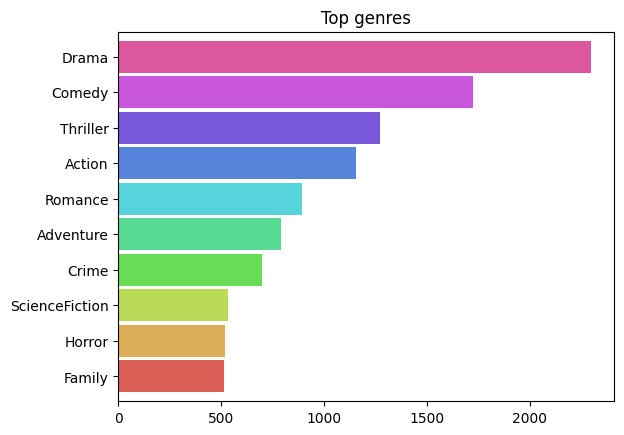

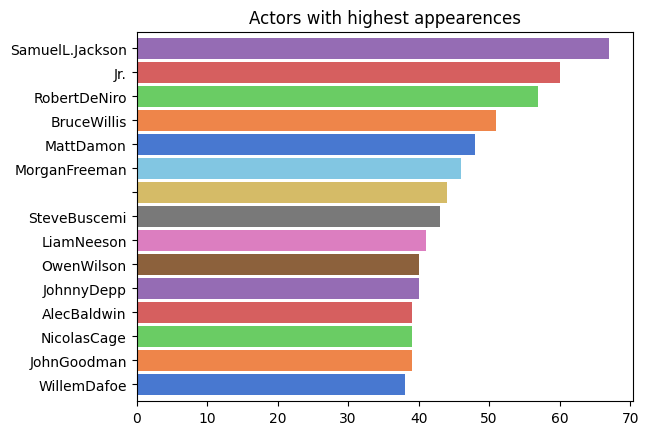

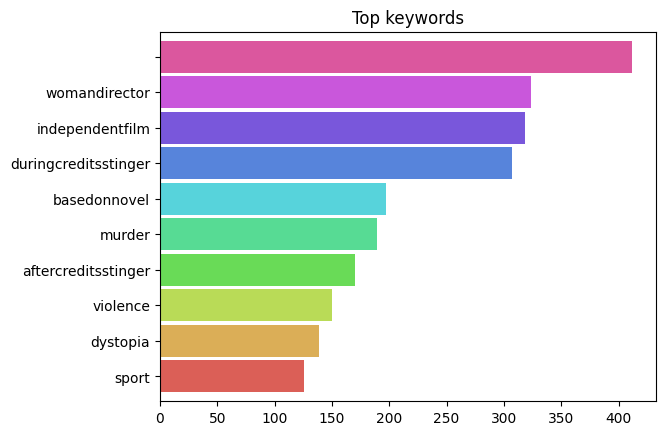

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv('data/tmdb_5000_movies.csv')
credits = pd.read_csv('data/tmdb_5000_credits.csv')

def convert_json(df, feature):
    df[feature] = df[feature].apply(json.loads)
    for index, val in zip(df.index, df[feature]):
        lst = []
        for i in range(len(val)):
            lst.append(val[i]['name'])
        df.loc[index, feature] = str(lst)

convert_json(movies, 'genres')
convert_json(movies, 'keywords')
convert_json(credits, 'cast')

# ----------------------------------------------------

# Merge csv files and select the relevant columns
movies = movies.merge(credits, left_on='id', right_on='movie_id', how='left')
movies = movies[['id', 'original_title', 'genres', 'cast', 'vote_average', 'keywords']]

# Clean the columns
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ', '').str.replace("'", '')
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ', '').str.replace("'", '')
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ', '').str.replace("'", '')

# Get lists
movies['genres'] = movies['genres'].str.split(',')
movies['cast'] = movies['cast'].str.split(',')
movies['keywords'] = movies['keywords'].str.split(',')

ic(movies.head())
ic(movies.index.values)
ic(movies.columns.values)
ic(movies.loc[25])

# ----------------------------------------------------

# Plot top genres
plt.subplots()
plt.title('Top genres')
lst = []
for i in movies['genres']:
    lst.extend(i)
ax = pd.Series(lst).value_counts()[:10].sort_values(ascending=True) \
        .plot.barh(width=0.9, color=sns.color_palette('hls', 10))

# Plot actors with highest appearences
plt.subplots()
plt.title('Actors with highest appearences')
lst = []
for i in movies['cast']:
    lst.extend(i)
ax = pd.Series(lst).value_counts()[:15].sort_values(ascending=True) \
        .plot.barh(width=0.9, color=sns.color_palette('muted', 40))

# Plot top keywords
plt.subplots()
plt.title('Top keywords')
lst = []
for i in movies['keywords']:
    lst.extend(i)
ax = pd.Series(lst).value_counts()[:10].sort_values(ascending=True) \
        .plot.barh(width=0.9, color=sns.color_palette('hls', 10))

plt.show()

### Binary Encoding / Step 3

Make movies `classification` according to their genres (encoding for multiple labels).  
Next based on `actors` (with highest contribution to the movie).  
Next based on their `keywords`.  

Luckily, the sequence of the actors in json is according to the actors' `contribution`.  
We select the main `4 actors` from each movie.  

In [113]:
# ------------------------------------------------------------------------------------
# Classify by genres (encoding for multiple labels)

genreList = []
for _, row in movies.iterrows():
    genres = row['genres']
    for v in genres:
        if v not in genreList:
            genreList.append(v)

# Binary values list (1 or 0 / genre is present or not in movie)
def binary(movie_genres):
    lst = []
    for v in genreList:
        if v in movie_genres:
            lst.append(1)
        else:
            lst.append(0)
    return lst

# New column that will hold the binary values    
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))

# ----------------------------------------------------------------
# Classify by actors (with highest contribution to the movie)

for val, index in zip(movies['cast'],movies.index):
    lst = val[:4]
    movies.loc[index, 'cast'] = str(lst)
    
movies['cast'] = movies['cast'].str.strip('[]').str.replace(" '",'').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')

castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    for i in cast:
        if i not in castList:
            castList.append(i)

# Binary values list (1 or 0 / actor is present or not in movie)
def binary(movie_actors):
    lst = []
    for v in castList:
        if v in movie_actors:
            lst.append(1)
        else:
            lst.append(0)
    return lst

# New column that will hold the binary values 
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
movies['cast_bin'].head()

# ------------------------------------------------------------------
# Classify by keywords (1/0 present or not)

keywordsList = []
for _, row in movies.iterrows():
    keywords = row['keywords']
    for v in keywords:
        if v not in keywordsList:
            keywordsList.append(v)

# Binary values list (1 or 0 / keyword is present or not in movie)
def binary(movie_keywords):
    lst = []
    for v in keywordsList:
        if v in movie_keywords:
            lst.append(1)
        else:
            lst.append(0)
    return lst

# New column that will hold the binary values    
movies['keywords_bin'] = movies['keywords'].apply(lambda x: binary(x))

# --------------------------------------------------------------------
# Output result

ic(genreList[:5])
ic(movies['genres_bin'].head())

ic(castList[:5])
ic(movies['cast_bin'].head())

ic(keywordsList[:5])
ic(movies['keywords_bin'].head())

ic(movies.loc[25]);

ic| genreList[:5]: ['Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime']
ic| movies['genres_bin'].head(): 0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                 1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                 2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                 3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                 4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                 Name: genres_bin, dtype: object
ic| castList[:5]: ['SamWorthington', 'ZoeSaldana', 'SigourneyWeaver', 'StephenLang', 'JohnnyDepp']
ic| movies['cast_bin'].head(): 0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               1    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
                               2    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...
                               3    [0, 0, 0, 0, 0, 0, 0,

### Similarity / Step 4

We have `binary` values which represents the presense or absence of a feature.  

The vectors formed using binary values are called `one-hot` encoded vectors.  
Each feature is represented as a separate `dimension`, with one value (0 or 1).  

For example, a data point with only `two` binary features (drama and comedy) can be represented by  
a `2-dimensional` vector, X-axis represents drama and the second dimension Y-axis represents comedy.

The angle between two 3-dimensional vectors can be computed using `cosine` similarity formula.  

In [114]:
from scipy import spatial

# Spatial distance between vectors
def similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]

    d1 = spatial.distance.cosine(a['genres_bin'], b['genres_bin'])
    d2 = spatial.distance.cosine(a['cast_bin'], b['cast_bin'])
    d3 = spatial.distance.cosine(a['keywords_bin'], b['keywords_bin'])

    return d1 + d2 + d3

ic(movies.iloc[3])
ic(movies.iloc[160])
ic(similarity(3, 160));


ic| movies.iloc[3]: id                                                            49026
                    original_title                                The Dark Knight Rises
                    genres                             [Action, Crime, Drama, Thriller]
                    cast              [ChristianBale, MichaelCaine, GaryOldman, Anne...
                    vote_average                                                    7.6
                    keywords          [dccomics, crimefighter, terrorist, secretiden...
                    genres_bin        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
                    cast_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
                    keywords_bin      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                    Name: 3, dtype: object
ic| movies.iloc[160]: id                                                            82702
                      original_title                           How to Train

### Make Predictions

The model `learned` to make predictions using K-neareast neighbour.  

In [115]:
import operator 

# Unknown (new) clean dataset
new_id = list(range(0, movies.shape[0]))
movies['new_id'] = new_id
movies = movies[[
    'original_title', 'genres', 'vote_average',
    'genres_bin', 'cast_bin', 'keywords_bin', 'new_id',
]]

# Find the 10 most similiar movies
def predict_movies(name):
    new_movie = movies[movies['original_title'].str.contains(name)]
    new_movie = new_movie.iloc[0].to_frame().T
    print('\nSelected Movie: ', new_movie.original_title.values[0], "\n")

    def getNeighbors(baseMovie, k_neighbors):
        distances = []

        for i, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                d = similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], d))
        distances.sort(key=operator.itemgetter(1))

        neighbors = []
        for i in range(k_neighbors):
            neighbors.append(distances[i])
        return neighbors

    neighbors = getNeighbors(new_movie, k_neighbors=10)
    for neighbor in neighbors:
        original_title = movies.iloc[neighbor[0]][0]
        genres = str(movies.iloc[neighbor[0]][1]).strip("[]").replace("'", "")
        rating = str(movies.iloc[neighbor[0]][2])
        print(original_title + " | Genres: " + genres + " | Rating: " + rating) 

predict_movies('Godfather')
predict_movies('Ice Age')


Selected Movie:  The Godfather: Part III 

The Godfather: Part II | Genres: Drama, Crime | Rating: 8.3
Donnie Brasco | Genres: Crime, Drama, Thriller | Rating: 7.4
The Son of No One | Genres: Drama, Thriller, Crime | Rating: 4.8
The Godfather | Genres: Drama, Crime | Rating: 8.4
Absolute Power | Genres: Crime, Drama, Thriller | Rating: 6.4
The Devil's Own | Genres: Crime, Thriller, Drama | Rating: 5.9
We Own the Night | Genres: Drama, Crime, Thriller | Rating: 6.5
The Counselor | Genres: Thriller, Crime, Drama | Rating: 5.0
The Rainmaker | Genres: Drama, Crime, Thriller | Rating: 6.7
Righteous Kill | Genres: Action, Crime, Drama, Thriller | Rating: 5.9

Selected Movie:  Ice Age: Continental Drift 

Ice Age | Genres: Animation, Comedy, Family, Adventure | Rating: 7.1
Ice Age: Dawn of the Dinosaurs | Genres: Animation, Comedy, Family, Adventure | Rating: 6.5
Ice Age: The Meltdown | Genres: Animation, Family, Comedy, Adventure | Rating: 6.5
Cars 2 | Genres: Animation, Family, Adventure, 

### Save Preprocess Data

We could save the cleaned and `processed` movies dataframe to a file.  
This way we won't have to `repeat` the data preparation steps every time.   
This could save a lot of `time` if you plan on running the code multiple times.  

In [116]:
import pathlib
import pandas as pd
import numpy as np
import json
from scipy import spatial
import operator
import pickle

movies = pd.read_csv('data/tmdb_5000_movies.csv')
credits = pd.read_csv('data/tmdb_5000_credits.csv')

# Change columns values from json to string
def convert_json(df, col):
    df[col] = df[col] \
                .apply(json.loads) \
                .apply(lambda x: [i['name'] for i in x]) \
                .apply(lambda x: str(x))

convert_json(movies, 'genres')
convert_json(movies, 'keywords')
convert_json(credits, 'cast')

# Merge csv files and select the relevant columns
movies = movies.merge(credits, left_on='id', right_on='movie_id', how='left')
movies = movies[['id', 'original_title', 'genres', 'cast', 'vote_average', 'keywords']]

"""
    Abstracting repetitive operations into a function makes your code 
    more efficient and easier to maintain.  

    Clean and split the data in a given column of a DataFrame.
    Use a regular expression to replace unwanted characters.
"""

# # Clean the columns
# movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ', '').str.replace("'", '')
# movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ', '').str.replace("'", '')
# movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ', '').str.replace("'", '')

# # Get lists
# movies['genres'] = movies['genres'].str.split(',')
# movies['cast'] = movies['cast'].str.split(',')
# movies['keywords'] = movies['keywords'].str.split(',')

def clean_and_split(df, col):
    cleaned_data = df[col].str.replace(r"[\[\]\'\s]", '', regex=True)
    return cleaned_data.str.split(',')

# Apply this function to each column
movies['genres'] = clean_and_split(movies, 'genres')
movies['cast'] = clean_and_split(movies, 'cast')
movies['keywords'] = clean_and_split(movies, 'keywords')

"""
    Using iterrows() for DataFrame manipulation is a common bottleneck in terms of performance.  
    Pandas provides vectorized operations which are much more efficient.  
"""

# Classify movies by genres

# genreList = []
# for _, row in movies.iterrows():
#     genres = row['genres']
#     for v in genres:
#         if v not in genreList:
#             genreList.append(v)

genre_set = set(g for genre_list in movies['genres'] 
                        for g in genre_list)

"""
    Pre-allocating lists is a useful optimization technique, 
    especially when you know the size of the list in advance.
    
    It can significantly speed up your code as it avoids the overhead 
    of dynamically resizing the list during runtime.
"""

# def binary_genres(movie_genres):
#     lst = []
#     for v in genre_set:
#         if v in movie_genres:
#             lst.append(1)
#         else:
#             lst.append(0)
#     return lst

def binary_genres(movie_genres):
    # Pre-allocate a list with zeros of the length of genre_set
    binary_list = [0] * len(genre_set)
    
    # Set the corresponding index to 1 if the genre is present in movie_genres
    for i, genre in enumerate(genre_set):
        if genre in movie_genres:
            binary_list[i] = 1
    
    return binary_list


# Classify movies by actors 

for val, index in zip(movies['cast'], movies.index): # select first 4 actors
    lst = val[:4]
    movies.loc[index, 'cast'] = str(lst)
movies['cast'] = clean_and_split(movies, 'cast')

# castList = []
# for index, row in movies.iterrows():
#     cast = row["cast"]
#     for i in cast:
#         if i not in castList:
#             castList.append(i)

cast_set = set(c for cast_list in movies['cast']
                    for c in cast_list)

# def binary_cast(movie_actors):
#     lst = []
#     for v in cast_set:
#         if v in movie_actors:
#             lst.append(1)
#         else:
#             lst.append(0)
#     return lst

def binary_cast(movie_actors):
    # Pre-allocate a list with zeros of the length of genre_set
    binary_list = [0] * len(cast_set)
    
    # Set the corresponding index to 1 if the genre is present in movie_genres
    for i, cast in enumerate(cast_set):
        if cast in movie_actors:
            binary_list[i] = 1
    
    return binary_list

# Classify movies by keywords

# keywordsList = []
# for _, row in movies.iterrows():
#     keywords = row['keywords']
#     for v in keywords:
#         if v not in keywordsList:
#             keywordsList.append(v)

keywords_set = set(k for keywords in movies['keywords']
                        for k in keywords)

# def binary_keywords(movie_keywords):
#     lst = []
#     for v in keywords_set:
#         if v in movie_keywords:
#             lst.append(1)
#         else:
#             lst.append(0)
#     return lst

def binary_keywords(movie_keywords):
    # Pre-allocate a list with zeros of the length of genre_set
    binary_list = [0] * len(keywords_set)
    
    # Set the corresponding index to 1 if the genre is present in movie_genres
    for i, keyword in enumerate(keywords_set):
        if keyword in movie_keywords:
            binary_list[i] = 1
    
    return binary_list

# New binary columns
movies['genres_bin'] = movies['genres'].apply(lambda x: binary_genres(x))
movies['cast_bin'] = movies['cast'].apply(lambda x: binary_cast(x)) 
movies['keywords_bin'] = movies['keywords'].apply(lambda x: binary_keywords(x))

# New clean dataset
new_id = list(range(0, movies.shape[0]))
movies['new_id'] = new_id
movies = movies[[
    'original_title', 'genres', 'vote_average',
    'genres_bin', 'cast_bin', 'keywords_bin', 'new_id',
]]

# Convert binary columns to numpy arrays for faster access
movies['genres_bin'] = movies['genres_bin'].apply(np.array)
movies['cast_bin'] = movies['cast_bin'].apply(np.array)
movies['keywords_bin'] = movies['keywords_bin'].apply(np.array)

# ------------------------------------------------------------------------------------

with open('data/movies_processed.pkl', 'wb') as f:
    pickle.dump(movies, f)

### User Input

Make predictions for `user` requests.

In [117]:
import numpy as np
import pandas as pd
import pickle
from scipy import spatial

# Load the preprocessed data
with open('data/movies_processed.pkl', 'rb') as f:
    movies = pickle.load(f)

def similarity(a, b):
    d1 = spatial.distance.cosine(a['genres_bin'], b['genres_bin'])
    d2 = spatial.distance.cosine(a['cast_bin'], b['cast_bin'])
    d3 = spatial.distance.cosine(a['keywords_bin'], b['keywords_bin'])
    return d1 + d2 + d3

def predict_score():
    name = input('Enter a movie title: ')
    new_movie = movies[movies['original_title'].str.contains(name, case=False, regex=False)].iloc[0]
    print('\nSelected Movie: ', new_movie.original_title, "\n")

    # Convert new_movie to a series for efficiency
    new_movie_series = new_movie[['genres_bin', 'cast_bin', 'keywords_bin']]

    # Calculate distances in a vectorized way
    distances = movies.apply(lambda x: similarity(new_movie_series, x) 
                             if x['new_id'] != new_movie['new_id'] else np.inf, axis=1)

    # Get the 10 most similar movies
    nearest_neighbors = distances.nsmallest(11).index

    for neighbor_idx in nearest_neighbors:
        if neighbor_idx != new_movie.name:  # Exclude the selected movie itself
            neighbor = movies.loc[neighbor_idx]
            print(f"{neighbor['original_title']} | Genres: {neighbor['genres']} | Rating: {neighbor['vote_average']}")

predict_score()



Selected Movie:  The Godfather: Part III 

The Godfather: Part II | Genres: ['Drama', 'Crime'] | Rating: 8.3
Donnie Brasco | Genres: ['Crime', 'Drama', 'Thriller'] | Rating: 7.4
The Son of No One | Genres: ['Drama', 'Thriller', 'Crime'] | Rating: 4.8
The Godfather | Genres: ['Drama', 'Crime'] | Rating: 8.4
Absolute Power | Genres: ['Crime', 'Drama', 'Thriller'] | Rating: 6.4
The Devil's Own | Genres: ['Crime', 'Thriller', 'Drama'] | Rating: 5.9
We Own the Night | Genres: ['Drama', 'Crime', 'Thriller'] | Rating: 6.5
The Counselor | Genres: ['Thriller', 'Crime', 'Drama'] | Rating: 5.0
The Rainmaker | Genres: ['Drama', 'Crime', 'Thriller'] | Rating: 6.7
Righteous Kill | Genres: ['Action', 'Crime', 'Drama', 'Thriller'] | Rating: 5.9
The Untouchables | Genres: ['Crime', 'Drama', 'History', 'Thriller'] | Rating: 7.6
